# Projeto - Introdução à Computação Quântica

### Desenvolvedores:
* José Rafael Martins Fernandes
* Thiago Hampl Pierri da Rocha

## Introdução

Os *kernel algorithms* desempenham um papel crucial em *machine learning*, permitindo a transformação de dados complexos em espaços de alta dimensão, tornando possível a resolução de problemas não linearmente separáveis. No entanto, o desenvolvimento destes algoritmos utilizando a computação clássica enfrenta desafios significativos quando se trata de lidar com grandes conjuntos de dados e tarefas complexas de *machine learning*. Dessa forma, a computação quântica pode ser uma utilizada como uma maneira de tentar melhorar o desempenho destes algoritmos. Assim, vamos analisar uma pesquisa recente que investiga a interseção entre os s *kernel algorithms* e a computação quântica, com um foco especial na avaliação das possíveis vantagens dos modelos quânticos em tarefas de aprendizado. 

## Revisão do Artigo

No artigo *Power of data in quantum machine learning*, os autores exploram o campo da computação quântica para *machine learning* e buscam avaliar as possíveis vantagens de modelos quânticos em tarefas de aprendizado. Eles começam enfatizando que tarefas de aprendizado de máquina que envolvem dados podem ser significativamente diferentes de outras tarefas computacionais comumente estudadas no domínio da computação quântica. Apesar dessa diferença, os autores demonstram que modelos clássicos de aprendizado de máquina, quando fornecidos com dados, podem competir com modelos quânticos, mesmo em situações em que a complexidade computacional é alta para a computação clássica.

Para avaliar as possíveis vantagens de modelos quânticos em tarefas de aprendizado, os autores introduzem o conceito de uma diferença geométrica, que mede a dissimilaridade entre modelos de *machine learning* clássicos e quânticos com base em suas medidas de similaridade. Eles demonstram como essa diferença geométrica pode ser calculada e usada como uma ferramenta para avaliar o potencial de vantagem quântica na previsão. Se a diferença geométrica for pequena, espera-se que os modelos clássicos de aprendizado de máquina forneçam um desempenho semelhante ou até superior aos modelos quânticos, independentemente dos valores ou rótulos de funções específicas. Por outro lado, uma grande diferença geométrica indica o potencial de uma vantagem quântica.

Assim, os autores realizam experimentos numéricos em conjuntos de dados projetados. Os resultados mostram que os modelos clássicos podem superar os modelos quânticos quando a diferença geométrica é pequena. No entanto, os autores também demonstram que um modelo quântico projetado pode apresentar uma significativa vantagem de previsão sobre os modelos clássicos quando a diferença geométrica é grande. Os experimentos destacam o papel dos dados na determinação das vantagens dos modelos de aprendizado de máquina quântica e enfatizam o potencial dos modelos quânticos projetados em fornecer um aumento na velocidade quântica em tarefas de aprendizado específicas.

## Nosso projeto

O objetivo do projeto consiste em empregar os experimentos mencionados no artigo a fim de verificar ou refutar as conclusões relativas às previsões entre os modelos clássicos e quânticos. Uma vez que o referido artigo aborda as condições que favorecem cada um desses modelos com base na geometria dos dados, planejamos aplicar tanto Kernels Clássicos quanto Quantum Kernels para avaliar tais vantagens, enquanto também examinamos a capacidade de previsão dos modelos quânticos em situações com diferenças significativas na geometria dos dados. Além disso, pretendemos realizar testes em múltiplas bases de dados, a fim de compreender a variabilidade dos resultados e demonstrar o impacto da estrutura dos dados nas conclusões do artigo.

## Problema

O principal desafio que enfrentamos no âmbito deste projeto reside na árdua tarefa de conduzir uma pesquisa para identificar e selecionar as bases de dados mais apropriadas que possam ser empregadas nas Provas de Conceito delineadas no artigo. Adicionalmente, nosso empenho se estende à aplicação de modelos tanto clássicos quanto quânticos, fazendo uso das bibliotecas que dão suporte a esses modelos, notadamente o scikit-learn e o Qiskit, a fim de alcançar resultados robustos e conclusivos em nossa análise.

## Referências
* https://www.nature.com/articles/s41467-021-22539-9
* https://qiskit.org/ecosystem/machine-learning/tutorials/03_quantum_kernel.html
* https://qiskit.org/ecosystem/machine-learning/tutorials/08_quantum_kernel_trainer.html

In [1]:
!pip install qiskit_algorithms


[notice] A new release of pip available: 23.1.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip


In [1]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

from qiskit_machine_learning.algorithms import QSVC
from qiskit_machine_learning.kernels import FidelityQuantumKernel
from qiskit.primitives import Sampler
from qiskit_algorithms.state_fidelities import ComputeUncompute
from qiskit import Aer
from qiskit.circuit.library import ZZFeatureMap

In [18]:
def classic_SVC(X, y, test_size=0.2, random_state=42):
    # Split the data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    # Create an SVC model
    svc_model = SVC(kernel='linear', random_state=random_state)

    # Train the model
    svc_model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = svc_model.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)

    return accuracy, y_pred, y_test


In [23]:
def quantum_SVC(X, y, test_size=0.2, random_state=42):
    # Split the data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    feature_map = ZZFeatureMap(feature_dimension=len(X.columns), reps=2, entanglement="linear")

    sampler = Sampler()

    fidelity = ComputeUncompute(sampler=sampler)

    quantum_kernel = FidelityQuantumKernel(fidelity=fidelity, feature_map=feature_map)

    # Create the QSVC model
    qsvc_model = QSVC(quantum_kernel=quantum_kernel)
    
    # Train the QSVC model
    qsvc_model.fit(X_train, y_train)

    # Test the model
    y_pred = qsvc_model.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)

    return accuracy, y_pred, y_test

In [24]:
df = pd.read_csv("data/breast_cancer_data.csv", header = 0)

sampled_df = df.sample(frac=0.20)

sampled_df.drop('id', axis=1, inplace=True)
sampled_df.drop('Unnamed: 32', axis=1, inplace=True)

sampled_df['diagnosis'] = sampled_df['diagnosis'].map({'M':1,'B':0})
sampled_df = sampled_df[["radius_mean", "texture_mean", "perimeter_mean", "area_mean", "smoothness_mean", "compactness_mean", "concavity_mean", "symmetry_mean", "fractal_dimension_mean", "diagnosis"]]

X = sampled_df.drop("diagnosis", axis=1)
y = sampled_df["diagnosis"]

accuracy_breast_cancer, y_pred_breast_cancer, y_test_breast_cancer = classic_SVC(X, y)
print(f"Accuracy of the SVC model: {accuracy_breast_cancer}")

accuracy_breast_cancer_quantum_svc, y_breast_cancer_pred_quantum_svc, y_breast_cancer_test_quantum_svc = quantum_SVC(X, y)
print(f"Accuracy of the Quantum SVC model: {accuracy_breast_cancer_quantum_svc}")

Accuracy of the SVC model: 0.8695652173913043
Accuracy of the Quantum SVC model: 0.7391304347826086


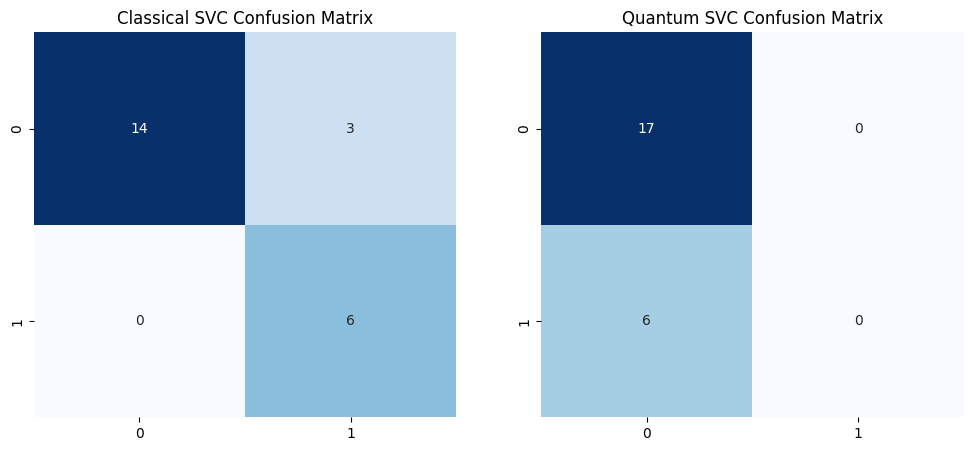

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Create confusion matrices
cm_classical = confusion_matrix(y_test_breast_cancer, y_pred_breast_cancer)
cm_quantum = confusion_matrix(y_breast_cancer_test_quantum_svc, y_breast_cancer_pred_quantum_svc)

# Plot confusion matrices
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.heatmap(cm_classical, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Classical SVC Confusion Matrix')

plt.subplot(1, 2, 2)
sns.heatmap(cm_quantum, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Quantum SVC Confusion Matrix')

plt.show()

In [28]:
df = pd.read_csv("data/fetal_health_data.csv", header = 0)

sampled_df = df.sample(frac=0.04)

sampled_df.drop_duplicates(inplace=True)

X = sampled_df.drop("fetal_health", axis=1)
y = sampled_df["fetal_health"]

accuracy_fetal_health, y_pred_fetal_health, y_test_fetal_health = classic_SVC(X, y)
print(f"Accuracy of the SVC model: {accuracy_fetal_health}")

accuracy_fetal_health_quantum_svc, y_fetal_health_pred_quantum_svc, y_fetal_health_test_quantum_svc = quantum_SVC(X, y)
print(f"Accuracy of the Quantum SVC model: {accuracy_fetal_health_quantum_svc}")

Accuracy of the SVC model: 0.7647058823529411


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Create confusion matrices
cm_classical = confusion_matrix(y_test_fetal_health, y_pred_fetal_health)
cm_quantum = confusion_matrix(y_fetal_health_test_quantum_svc, y_fetal_health_pred_quantum_svc)

# Plot confusion matrices
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.heatmap(cm_classical, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Classical SVC Confusion Matrix')

plt.subplot(1, 2, 2)
sns.heatmap(cm_quantum, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Quantum SVC Confusion Matrix')

plt.show()

In [5]:
df = pd.read_csv("data/credit_card.csv", header = 0)
y = pd.read_csv("data/credit_card_label.csv", header = 0)

df = df.dropna()

df = df.drop(['Housing_type', 'Type_Occupation', 'Type_Income'], axis = 1)

df_encoded = pd.get_dummies(df, columns=['GENDER', 'Car_Owner', 'Propert_Owner', 'EDUCATION', 'Marital_status'])

df_encoded = pd.merge(df_encoded, y, on='Ind_ID', how='inner')

sampled_df = df_encoded.sample(frac=0.04)

X = sampled_df.drop("label", axis=1)
y = sampled_df["label"]

accuracy_credit_card, y_pred_credit_card, y_test_credit_card = classic_SVC(X, y)
print(f"Accuracy of the SVC model: {accuracy_credit_card}")

accuracy_credit_card_quantum_svc, y_credit_card_pred_quantum_svc, y_credit_card_test_quantum_svc = quantum_SVC(X, y)
print(f"Accuracy of the Quantum SVC model: {accuracy_credit_card_quantum_svc}")

Accuracy of the SVC model: 0.6666666666666666


TypeError: Invalid parameter values, expected Sequence[Sequence[float]].

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Create confusion matrices
cm_classical = confusion_matrix(y_test_credit_card, y_pred_credit_card)
cm_quantum = confusion_matrix(y_credit_card_test_quantum_svc, y_credit_card_pred_quantum_svc)

# Plot confusion matrices
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.heatmap(cm_classical, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Classical SVC Confusion Matrix')

plt.subplot(1, 2, 2)
sns.heatmap(cm_quantum, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Quantum SVC Confusion Matrix')

plt.show()